In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\BCW\BCW_AW_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,5,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1
1,5,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1
2,3,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1
3,6,8.0,NaN,1.0,NaN,NaN,3.0,NaN,1
4,4,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1
...,...,...,...,...,...,...,...,...,...
678,3,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1
679,2,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1
680,5,10.0,10.0,10.0,4.0,10.0,5.0,6.0,3
681,1,1.0,1.0,3.0,2.0,1.0,1.0,1.0,1


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
int64		column 1	0
float64		column 2	50
float64		column 3	112
float64		column 4	82
float64		column 5	82
float64		column 6	82
float64		column 7	80
float64		column 8	96
int64		column 9	0


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
count,683.000000,633.00000,571.000000,601.000000,601.000000,601.000000,603.000000,587.000000,683.000000
mean,4.442167,3.14060,3.082312,2.780366,3.222962,3.467554,3.349917,2.817717,1.603221
std,2.820761,3.05811,2.938293,2.852195,2.234623,3.617462,2.384602,3.026475,1.732674
min,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.00000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.00000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,5.00000,4.000000,3.000000,4.000000,5.000000,4.000000,3.000000,1.000000
max,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


<AxesSubplot:>

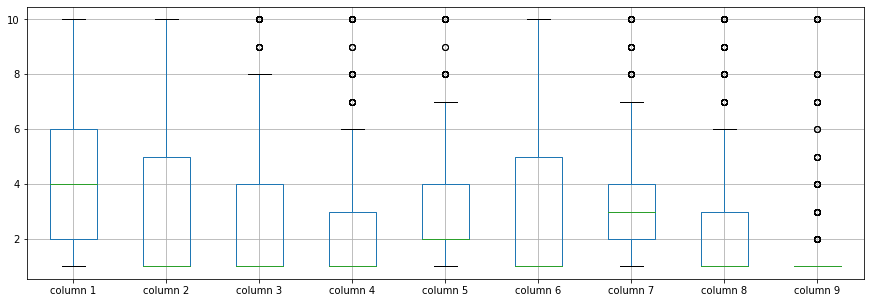

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    4.442167
column 2    3.140600
column 3    3.082312
column 4    2.780366
column 5    3.222962
column 6    3.467554
column 7    3.349917
column 8    2.817717
column 9    1.603221
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
column 1,1.000000,0.635410,0.648208,0.469772,0.527743,0.590173,0.534715,0.535571,0.350957
column 2,0.635410,1.000000,0.911173,0.716773,0.746021,0.682934,0.740127,0.713242,0.470961
column 3,0.648208,0.911173,1.000000,0.702313,0.735903,0.710181,0.725887,0.703908,0.423693
column 4,0.469772,0.716773,0.702313,1.000000,0.595458,0.676927,0.654168,0.611200,0.449007
column 5,0.527743,0.746021,0.735903,0.595458,1.000000,0.592627,0.619336,0.634652,0.482532
column 6,0.590173,0.682934,0.710181,0.676927,0.592627,1.000000,0.650066,0.585156,0.331552
column 7,0.534715,0.740127,0.725887,0.654168,0.619336,0.650066,1.000000,0.672041,0.319594
column 8,0.535571,0.713242,0.703908,0.611200,0.634652,0.585156,0.672041,1.000000,0.438263
column 9,0.350957,0.470961,0.423693,0.449007,0.482532,0.331552,0.319594,0.438263,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [9,9+60,9+60+60,9+60+60,9+60+60+60+60,9+60+60+60+60+60,9+60+60+60+60+60+60,9+60+60+60+60+60,9+60+60+60+60,9+60+60+60,9+60+60,9+60,9], vae_layer = False, seed = 600)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [9]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 32.76698539370582
Epoch: 1 , loss: 32.86865829286121
Epoch: 2 , loss: 31.820091474623908
Epoch: 3 , loss: 30.142542384919665
Epoch: 4 , loss: 29.51698571159726
Epoch: 5 , loss: 29.161534672691708
Epoch: 6 , loss: 29.005740619841077
Epoch: 7 , loss: 28.822062583196733
Epoch: 8 , loss: 28.40054448445638
Epoch: 9 , loss: 27.94763687678746
Epoch: 10 , loss: 27.90236286889939
Epoch: 11 , loss: 26.999401751018706
Epoch: 12 , loss: 27.022544588361466
Epoch: 13 , loss: 26.473859673454648
Epoch: 14 , loss: 26.61724076952253
Epoch: 15 , loss: 26.738824276697066
Epoch: 16 , loss: 26.24437057404291
Epoch: 17 , loss: 26.57508014497303
Epoch: 18 , loss: 25.630157652355376
Epoch: 19 , loss: 26.119384992690314
Epoch: 20 , loss: 26.024528821309406
Epoch: 21 , loss: 25.56326153164818
Epoch: 22 , loss: 25.649241969698952
Epoch: 23 , loss: 24.81524537858509
Epoch: 24 , loss: 24.790291036878312
Epoch: 25 , loss: 25.42499989

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(683, 9)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    3.0
column 2    1.0
column 3    1.0
column 4    1.0
column 5    2.0
column 6    1.0
column 7    2.0
column 8    1.0
column 9    1.0
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\BCW.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0
1,0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0
2,0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0
3,0,0.0,-6.377198,0.0,-1.383034,-2.226933,0.0,-5.576443,0
4,0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0
...,...,...,...,...,...,...,...,...,...
678,0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0
679,0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0
680,0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0
681,0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(80.84310496375132, 335.3281974424459)

In [17]:
NRMS=numerator/denominator
NRMS


0.24108651041082468

In [18]:
new_df.iloc[66,:]

column 1    1.0
column 2    3.0
column 3    3.0
column 4    2.0
column 5    2.0
column 6    1.0
column 7    7.0
column 8    2.0
column 9    1.0
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,5,1.0,1.000000,1.0,2.000000,1.000000,3.0,1.000000,1
1,5,4.0,4.000000,5.0,7.000000,10.000000,3.0,2.000000,1
2,3,1.0,1.000000,1.0,2.000000,2.000000,3.0,1.000000,1
3,6,8.0,1.622802,1.0,1.616966,1.773067,3.0,1.423557,1
4,4,1.0,1.000000,3.0,2.000000,1.000000,3.0,1.000000,1
...,...,...,...,...,...,...,...,...,...
678,3,1.0,1.000000,1.0,2.000000,1.000000,2.0,1.000000,1
679,2,1.0,1.000000,1.0,2.000000,1.000000,3.0,1.000000,1
680,5,10.0,10.000000,10.0,4.000000,10.000000,5.0,6.000000,3
681,1,1.0,1.000000,3.0,2.000000,1.000000,1.0,1.000000,1


In [ ]:
imputations[-1].to_excel("BCW_AW_10(imp).xlsx", index=False, header=False)